# Task - 1 Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

## Author: Nitin Pilkhwal, Data Science Intern at LetsGrowMore
Link for the dataset: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Importing Dataset

In [2]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(url)
df = df.iloc[::-1]

## Analyzing Dataset

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [7]:
df.shape

(2035, 8)

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

## Data Mining and preprocessing

In [9]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
df.duplicated().sum()

0

<AxesSubplot: >

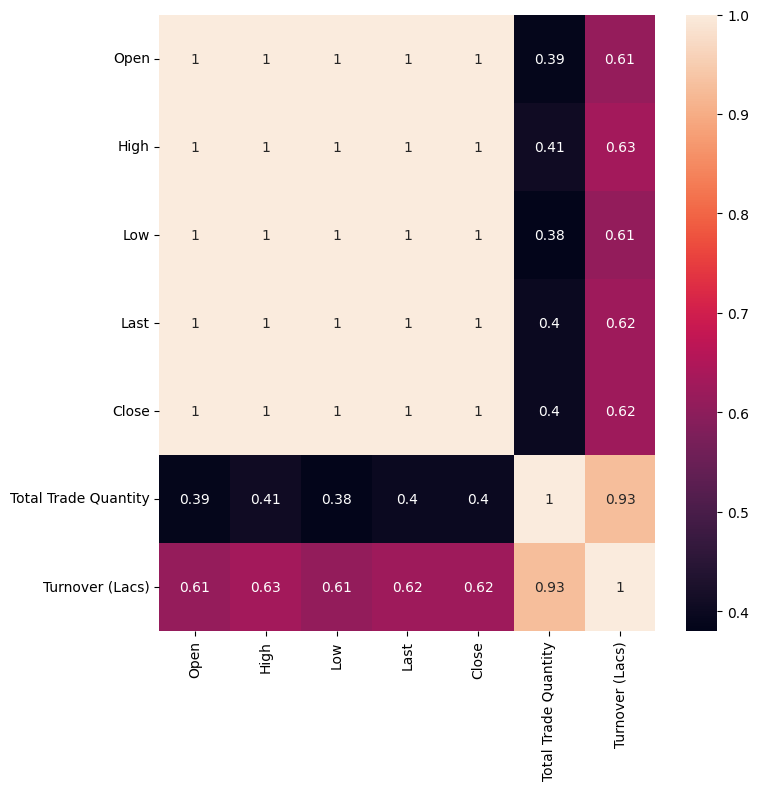

In [11]:
%%capture --no-display
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot: >

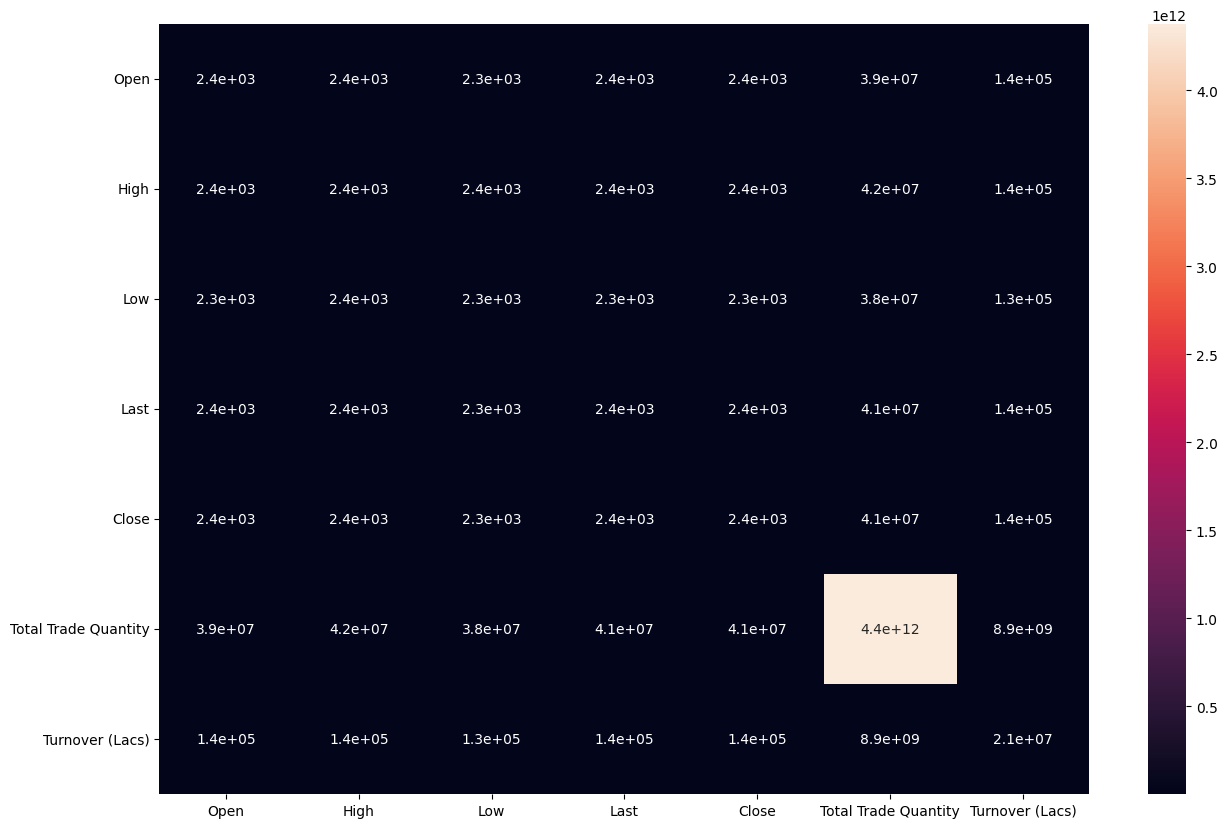

In [12]:
%%capture --no-display
plt.figure(figsize = (15,10))
sns.heatmap(df.cov(),annot = True)

## Data Visualization

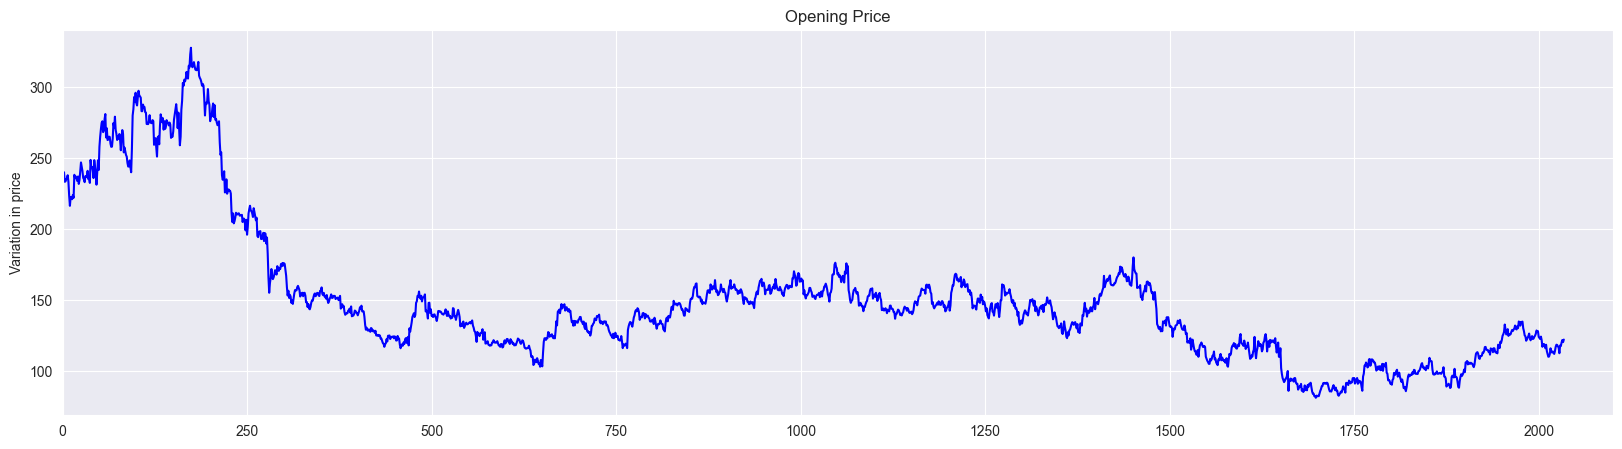

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(df.Open,color='b')
plt.xlim(0,2100)
plt.ylabel('Variation in price')
plt.title("Opening Price")
plt.show()

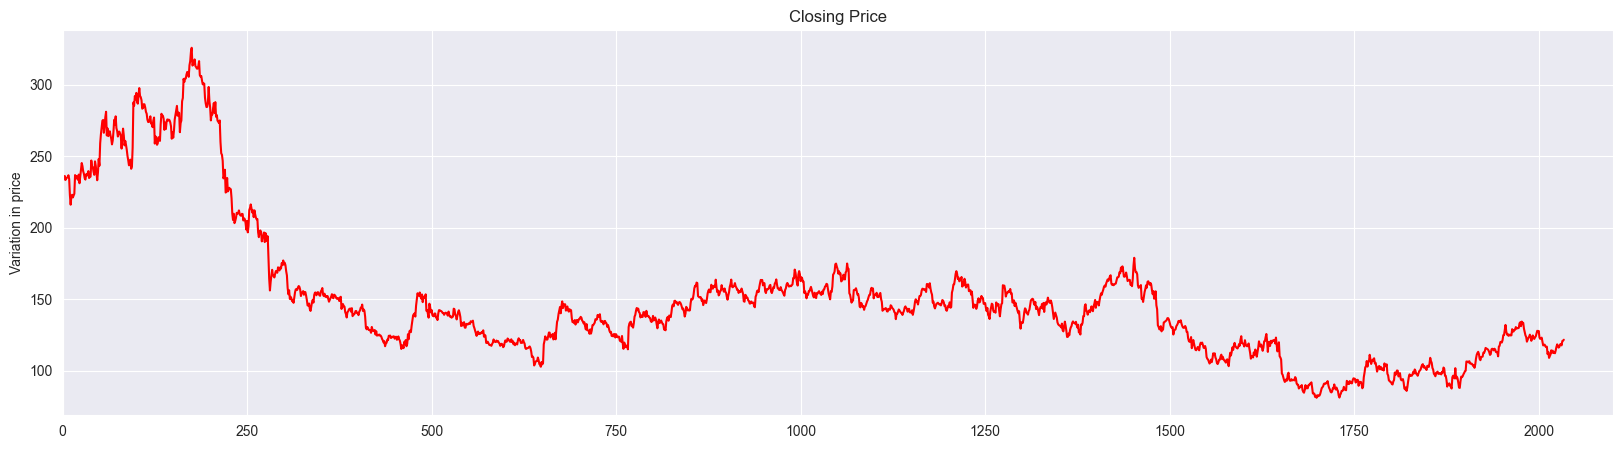

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(df.Close,color='r')
plt.xlim(0,2100)
plt.ylabel('Variation in price')
plt.title("Closing Price")
plt.show()

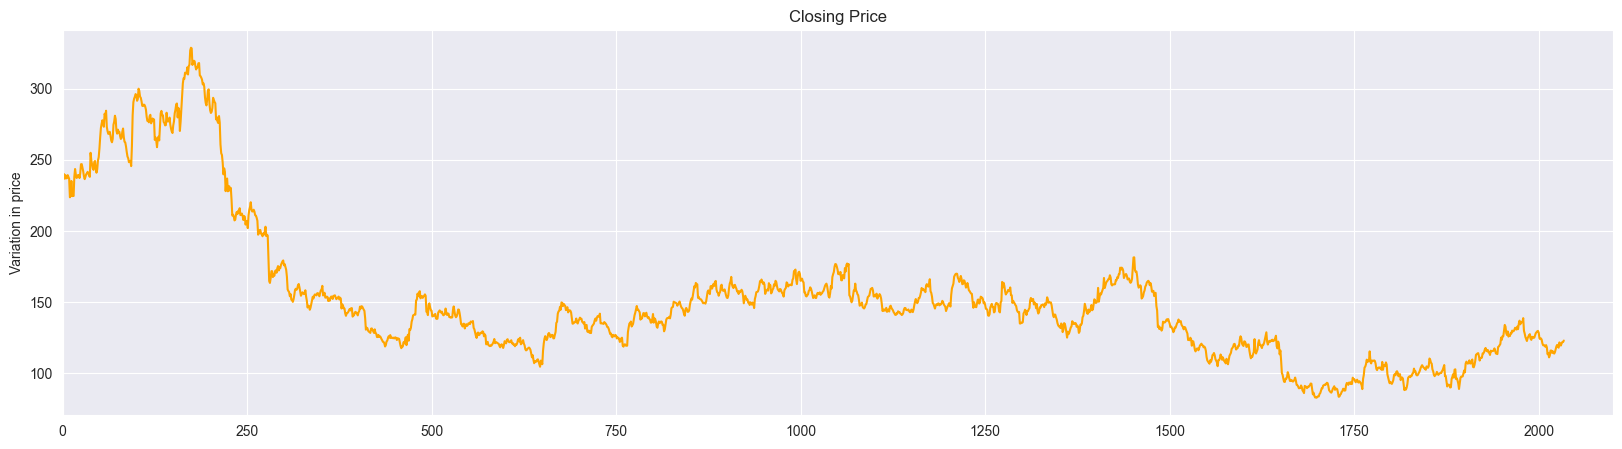

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(df.High,color='orange')
plt.xlim(0,2100)
plt.ylabel('Variation in price')
plt.title("Closing Price")
plt.show()

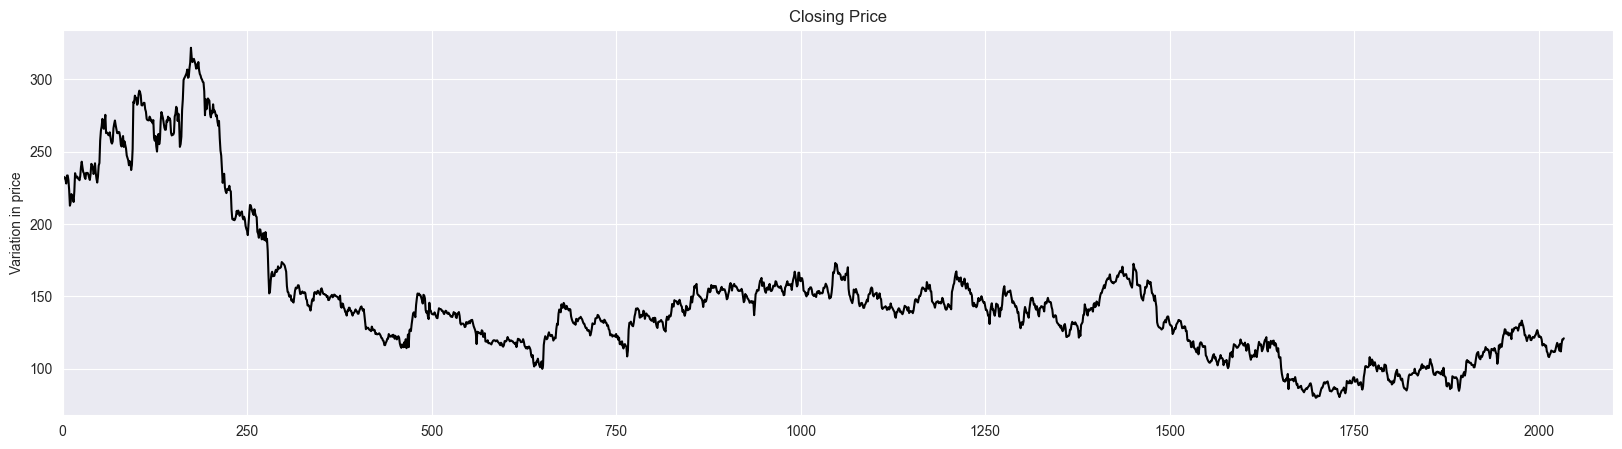

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(df.Low,color='black')
plt.xlim(0,2100)
plt.ylabel('Variation in price')
plt.title("Closing Price")
plt.show()

In [17]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df['Date']
df.drop('Date',axis = 1,inplace = True)

In [18]:
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60


## Building Model

In [19]:
High = df.reset_index()['High']

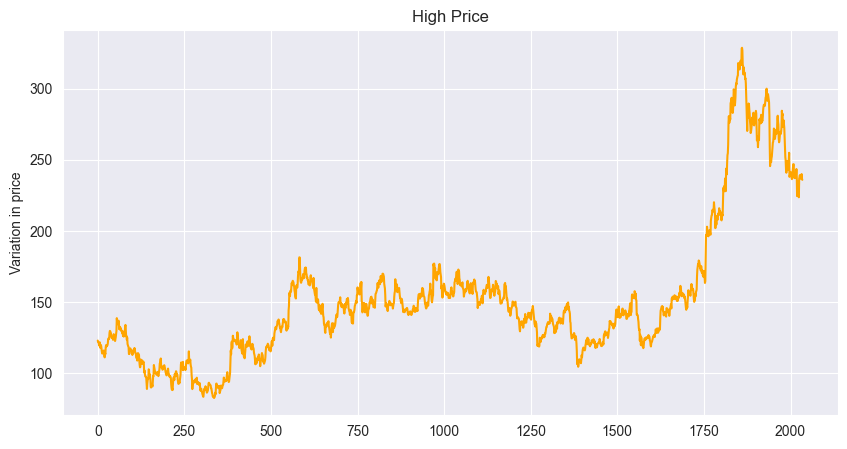

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
plt.plot(High,color='orange')
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()

In [21]:
scaler = MinMaxScaler(feature_range = (0,1))
High = scaler.fit_transform(np.array(High).reshape(-1,1))

In [22]:
High.shape

(2035, 1)

In [23]:
High

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

## Splitting the data into train and test dataset

In [24]:
train_size = int(len(High)*0.75)
test_size = len(High) - train_size

In [25]:
train_size,test_size

(1526, 509)

In [26]:
train_data = High[:train_size,:]
test_data = High[train_size:,:]

In [27]:
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [28]:
time_step = 100
X_train,Y_train=create_dataset(train_data,time_step)
X_test,Y_test = create_dataset(test_data,time_step)

In [29]:
print("Shape of training data of X",X_train.shape)
print("Shape of testing data of X",X_test.shape)

Shape of training data of X (1425, 100)
Shape of testing data of X (408, 100)


## Reshaping the input to (samples,time steps, features)

In [30]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [36]:
print("Shape of training data of X",X_train.shape)
print("Shape of testing data of X",X_test.shape)
print("Shape of training data of Y",Y_train.shape)
print("Shape of testing data of Y",Y_test.shape)

Shape of training data of X (1425, 100, 1)
Shape of testing data of X (408, 100, 1)
Shape of training data of Y (1425,)
Shape of testing data of Y (408,)


# Creating the LSTM Model 

In [38]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 22s 365ms/step - loss: 0.0103 - val_loss: 0.0371
Epoch 2/100
23/23 [==============================] - 7s 291ms/step - loss: 0.0018 - val_loss: 0.0057
Epoch 3/100
23/23 [==============================] - 7s 292ms/step - loss: 8.4320e-04 - val_loss: 0.0029
Epoch 4/100
23/23 [==============================] - 7s 292ms/step - loss: 7.6365e-04 - val_loss: 0.0028
Epoch 5/100
23/23 [==============================] - 7s 298ms/step - loss: 7.5641e-04 - val_loss: 0.0031
Epoch 6/100
23/23 [==============================] - 7s 295ms/step - loss: 7.3459e-04 - val_loss: 0.0031
Epoch 7/100
23/23 [==============================] - 7s 289ms/step - loss: 6.9721e-04 - val_loss: 0.0035
Epoch 8/100
23/23 [==============================] - 7s 299ms/step - loss: 6.8291e-04 - val_loss: 0.0043
Epoch 9/100
23/23 [==============================] - 7s 296ms/step - loss: 6.8044e-04 - val_loss: 0.0049
Epoch 10/100
23/23 [==============================] - 7s 294ms

23/23 [==============================] - 7s 320ms/step - loss: 1.3189e-04 - val_loss: 8.2645e-04
Epoch 78/100
23/23 [==============================] - 7s 321ms/step - loss: 1.2293e-04 - val_loss: 6.5900e-04
Epoch 79/100
23/23 [==============================] - 7s 309ms/step - loss: 1.2494e-04 - val_loss: 6.5904e-04
Epoch 80/100
23/23 [==============================] - 7s 317ms/step - loss: 1.2451e-04 - val_loss: 0.0011
Epoch 81/100
23/23 [==============================] - 7s 325ms/step - loss: 1.3417e-04 - val_loss: 8.2394e-04
Epoch 82/100
23/23 [==============================] - 7s 312ms/step - loss: 1.1892e-04 - val_loss: 4.1536e-04
Epoch 83/100
23/23 [==============================] - 7s 292ms/step - loss: 1.4276e-04 - val_loss: 6.7779e-04
Epoch 84/100
23/23 [==============================] - 7s 300ms/step - loss: 1.3844e-04 - val_loss: 4.6127e-04
Epoch 85/100
23/23 [==============================] - 7s 294ms/step - loss: 1.2455e-04 - val_loss: 7.7136e-04
Epoch 86/100
23/23 [=======

## Making predictions


In [49]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [50]:
# transforming to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Model Evaluation


### Calculatin RMSE performance metrics

In [52]:
math.sqrt(mean_squared_error(Y_train,train_predict))

136.19012069227085

## Plotting the results

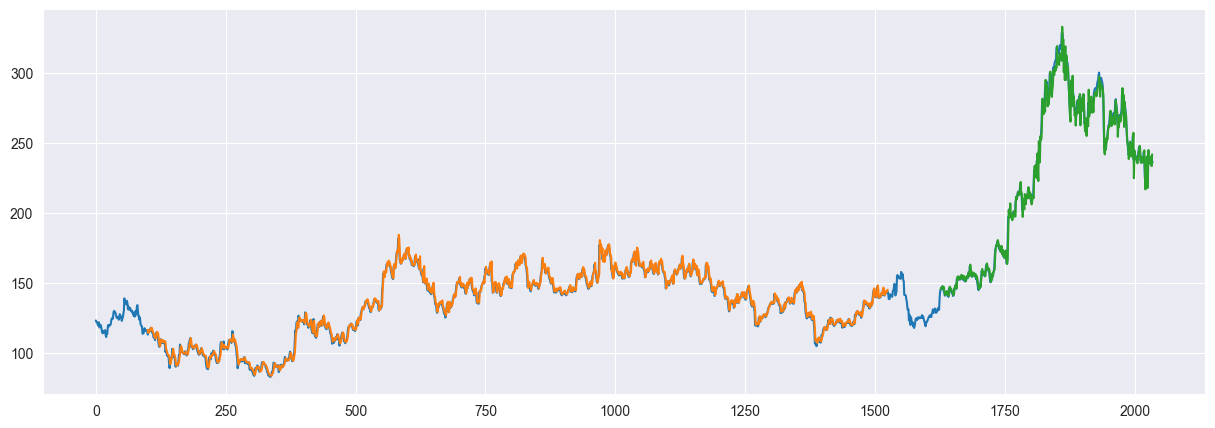

In [56]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(High)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(High)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(High) - 1, :] = test_predict

#Plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(High))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Making predictions for next 30 days


In [65]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [58]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [68]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)


0 day input [0.67838992 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639
 0.64118723 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603
 0.6574507  0.66761537 0.66720878 0.64159382 0.62776987 0.63651149
 0.63630819 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574
 0.57653995 0.57816629 0.57613336 0.61943484 0.57979264 0.57288067
 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567  0.63590161
 0.62594023 0.6391543  0.62614353 0.62268754 0.61847585 0.61250055
 0.60308433 0.59437907 0.58679569 0.57941902 0.57281798 0.56710017
 0.56240803 0.55864495 0.55566877 0.55332035 0.55143631 0.54985434
 0.54843366 0.54706138 0.54565561 0.54416406 0.54256201 0.54084605
 0.53903109 0.5371418  0.53520972 0.5332675  0.53134525 0.52946919
 0.52765918 0.5259285  0.52428412 0.52272785 0.52125704 0.51986557
 0.51854581 0.51728868 0.51608568 0.5149287  0.51381099 0.51272696
 0.51167238 0.51064456 0.50964159 0.5086624  0.50770706 0.50677562
 0.50586832 0.50498575 0.50412828 0.50329614 0.502

7 day output [[0.49107435]]
8 day input [0.63081927 0.62472047 0.6330555  0.64728603 0.6574507  0.66761537
 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819 0.62980281
 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995 0.57816629
 0.57613336 0.61943484 0.57979264 0.57288067 0.62573694 0.63102257
 0.6361049  0.62776987 0.6269567  0.63590161 0.62594023 0.6391543
 0.62614353 0.62268754 0.61847585 0.61250055 0.60308433 0.59437907
 0.58679569 0.57941902 0.57281798 0.56710017 0.56240803 0.55864495
 0.55566877 0.55332035 0.55143631 0.54985434 0.54843366 0.54706138
 0.54565561 0.54416406 0.54256201 0.54084605 0.53903109 0.5371418
 0.53520972 0.5332675  0.53134525 0.52946919 0.52765918 0.5259285
 0.52428412 0.52272785 0.52125704 0.51986557 0.51854581 0.51728868
 0.51608568 0.5149287  0.51381099 0.51272696 0.51167238 0.51064456
 0.50964159 0.5086624  0.50770706 0.50677562 0.50586832 0.50498575
 0.50412828 0.50329614 0.50248927 0.50170714 0.5009495  0.50021577
 0.49950501 0.49881652 0.

15 day output [[0.48787957]]
16 day input [0.62776987 0.63651149 0.63630819 0.62980281 0.62817646 0.63813783
 0.65358813 0.63183574 0.57653995 0.57816629 0.57613336 0.61943484
 0.57979264 0.57288067 0.62573694 0.63102257 0.6361049  0.62776987
 0.6269567  0.63590161 0.62594023 0.6391543  0.62614353 0.62268754
 0.61847585 0.61250055 0.60308433 0.59437907 0.58679569 0.57941902
 0.57281798 0.56710017 0.56240803 0.55864495 0.55566877 0.55332035
 0.55143631 0.54985434 0.54843366 0.54706138 0.54565561 0.54416406
 0.54256201 0.54084605 0.53903109 0.5371418  0.53520972 0.5332675
 0.53134525 0.52946919 0.52765918 0.5259285  0.52428412 0.52272785
 0.52125704 0.51986557 0.51854581 0.51728868 0.51608568 0.5149287
 0.51381099 0.51272696 0.51167238 0.51064456 0.50964159 0.5086624
 0.50770706 0.50677562 0.50586832 0.50498575 0.50412828 0.50329614
 0.50248927 0.50170714 0.5009495  0.50021577 0.49950501 0.49881652
 0.49814925 0.49750248 0.49687532 0.49626696 0.49567664 0.49510363
 0.49454713 0.49400687 

23 day output [[0.48534387]]
24 day input [0.57653995 0.57816629 0.57613336 0.61943484 0.57979264 0.57288067
 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567  0.63590161
 0.62594023 0.6391543  0.62614353 0.62268754 0.61847585 0.61250055
 0.60308433 0.59437907 0.58679569 0.57941902 0.57281798 0.56710017
 0.56240803 0.55864495 0.55566877 0.55332035 0.55143631 0.54985434
 0.54843366 0.54706138 0.54565561 0.54416406 0.54256201 0.54084605
 0.53903109 0.5371418  0.53520972 0.5332675  0.53134525 0.52946919
 0.52765918 0.5259285  0.52428412 0.52272785 0.52125704 0.51986557
 0.51854581 0.51728868 0.51608568 0.5149287  0.51381099 0.51272696
 0.51167238 0.51064456 0.50964159 0.5086624  0.50770706 0.50677562
 0.50586832 0.50498575 0.50412828 0.50329614 0.50248927 0.50170714
 0.5009495  0.50021577 0.49950501 0.49881652 0.49814925 0.49750248
 0.49687532 0.49626696 0.49567664 0.49510363 0.49454713 0.49400687
 0.49348223 0.49297237 0.49247709 0.49199578 0.49152836 0.49107435
 0.4906331  0.490204

In [69]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [70]:
day_new.shape

(100,)

In [71]:
day_pred.shape

(30,)

In [73]:
data_new = High.tolist()
data_new.extend(lst_output)

In [74]:
len(High)

2035

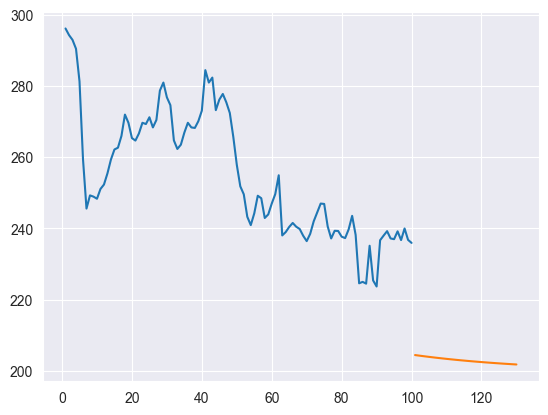

In [81]:
plt.plot(day_new, scaler.inverse_transform(High[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

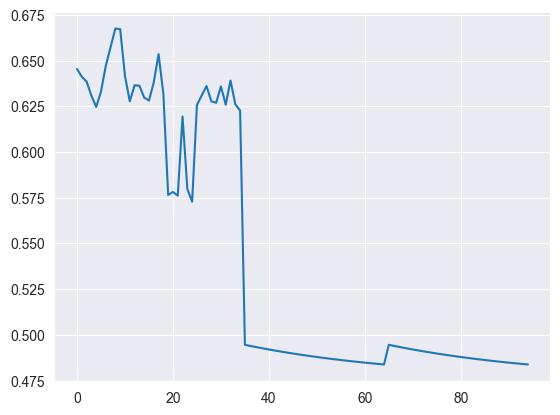

In [78]:
dta_new = High.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [82]:
data_new = scaler.inverse_transform(data_new).tolist()


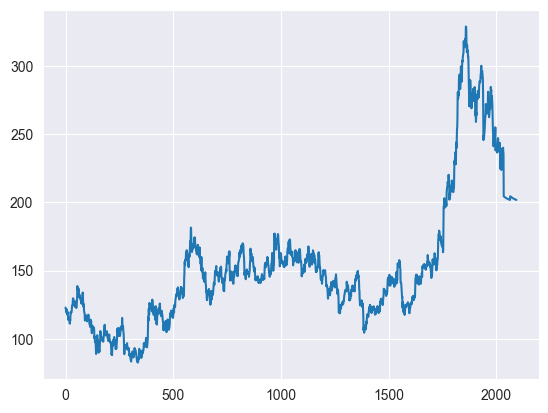

In [83]:
plt.plot(data_new)


# Thank You